In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

FONT_SIZE = 16


In [43]:
img_filmed = imread('abgefilmt.jpg')
img_clean = imread('orig.jpg')




In [44]:
img_filmed_gray = rgb2gray(img_filmed)
# plt.imshow(img_filmed_gray, cmap='gray')
# plt.show()


In [45]:
img_clean_gray = rgb2gray(img_clean)
# plt.imshow(img_clean_gray, cmap='gray')
# plt.show()


Text(0.5, 1.0, 'img_clean_gray')

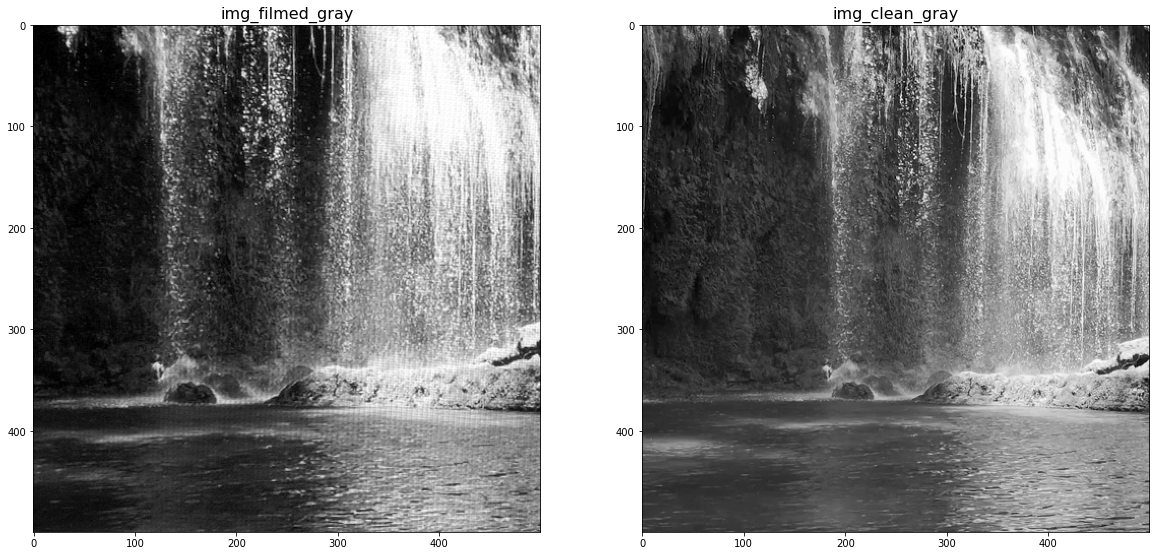

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img_filmed_gray, cmap="gray")
ax[0].set_title("img_filmed_gray", fontsize=FONT_SIZE)
ax[1].imshow(img_clean_gray, cmap="gray")
ax[1].set_title("img_clean_gray", fontsize=FONT_SIZE)


In [47]:
IMG_HEIGHT =  img_filmed.shape[0]
IMG_WIDTH =  img_filmed.shape[1]


## Create Fourier Images


In [48]:
img_filmed_gray_fourier = np.fft.fftshift(np.fft.fft2(img_filmed_gray))
img_clean_gray_fourier = np.fft.fftshift(np.fft.fft2(img_clean_gray))

plt.imsave("img_filmed_gray_fourier.png", np.log(
    abs(img_filmed_gray_fourier)), cmap="gray")
plt.imsave("img_clean_gray_fourier.png", np.log(
    abs(img_clean_gray_fourier)), cmap="gray")

img_filmed_gray_fourier[0][0]
np.max(np.log( abs(img_filmed_gray_fourier)))


11.502377773972697

## Load fourier mask

In [49]:
# Load fourier mask
fourier_mask = imread("fourier_mask_2.png")
fourier_mask = rgb2gray(fourier_mask)


Text(0.5, 1.0, 'fourier mask (simpel grayscale Image) created in Natron')

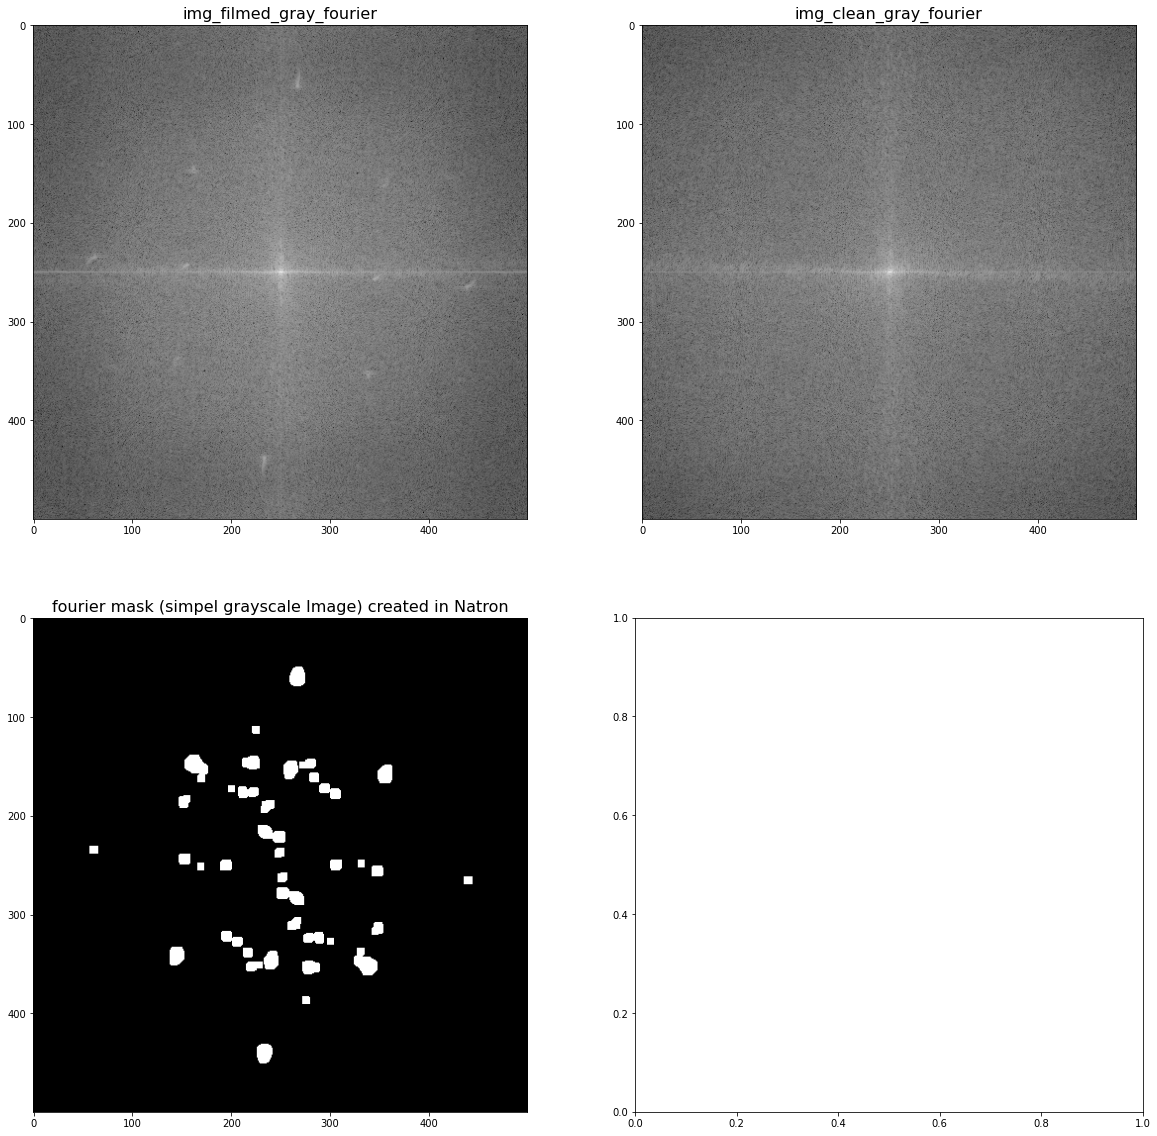

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0][0].imshow(np.log( abs(img_filmed_gray_fourier)), cmap="gray")
ax[0][0].set_title("img_filmed_gray_fourier", fontsize=FONT_SIZE)
ax[0][1].imshow(np.log(abs(img_clean_gray_fourier)), cmap="gray")
ax[0][1].set_title("img_clean_gray_fourier", fontsize=FONT_SIZE)
ax[1][0].imshow(fourier_mask, cmap="gray")
ax[1][0].set_title("fourier mask (simpel grayscale Image) created in Natron", fontsize=FONT_SIZE)


# Loop through images an replace appropriate sections

In [51]:
img_clean_gray_fourier


array([[ 6.84149882-1.77635684e-14j, -4.04080833+5.05564268e+00j,
         2.21006863+7.21634677e+00j, ...,  3.93126041-2.11004546e+00j,
         2.21006863-7.21634677e+00j, -4.04080833-5.05564268e+00j],
       [-0.00808938-2.86876752e+00j,  1.58271464+5.72359292e+00j,
        -3.69272285-4.81798830e+00j, ..., -5.33649839-1.76658407e+00j,
        -2.17915686-6.17583465e+00j, -0.05790213-3.39765294e-01j],
       [ 0.46462128+7.51215090e-01j,  0.37932323+2.01247673e+00j,
         1.4591342 +9.15062720e+00j, ...,  1.53838874-1.00517362e+00j,
         2.06905832-4.48039387e-01j, -3.56547089+7.46614356e-02j],
       ...,
       [ 4.77672958+2.31248157e+00j, -2.30184233+5.04465559e-01j,
        -5.99338134-4.50577015e+00j, ...,  6.48247041+6.34749644e+00j,
        -5.49430736-3.61765439e+00j,  0.99010631-1.25646204e+00j],
       [ 0.46462128-7.51215090e-01j, -3.56547089-7.46614356e-02j,
         2.06905832+4.48039387e-01j, ..., -3.37851196-4.70425751e+00j,
         1.4591342 -9.15062720e+00j

(500, 500)


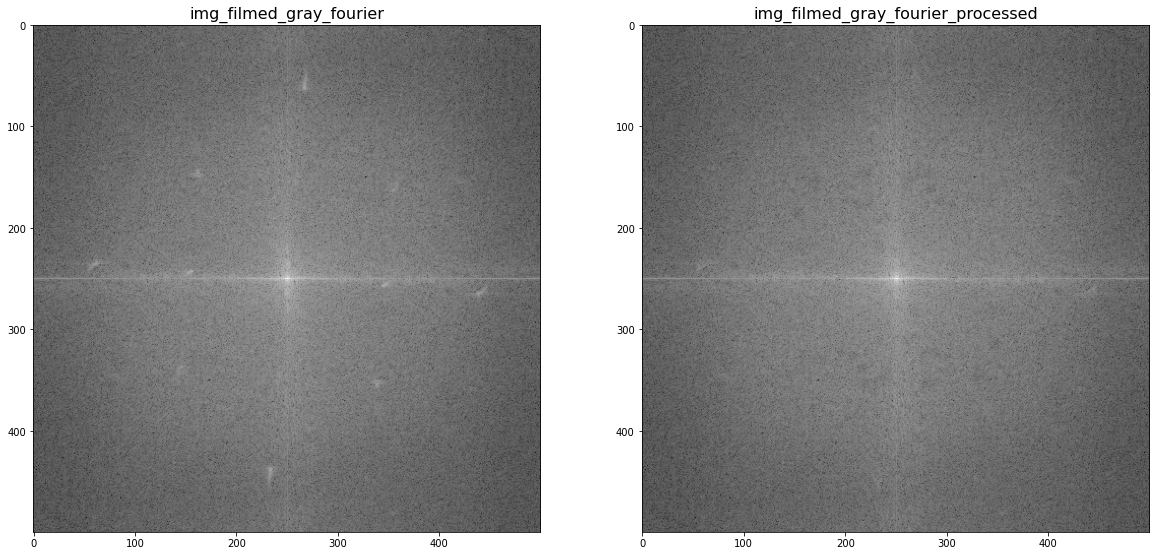

In [54]:

img_filmed_gray_fourier_processd = img_filmed_gray_fourier.copy()

print(fourier_mask.shape)

for y in range(IMG_HEIGHT):
    for x in range(IMG_WIDTH):
        if fourier_mask[y][x]>=0.8:
            img_filmed_gray_fourier_processd[y][x] = img_clean_gray_fourier[y][x]
            # print(f"In if: {y}, {x}")


# plt.imshow(np.log(abs(img_filmed_gray_fourier)), cmap="gray")
# plt.show()

# plt.imshow(np.log(abs(img_filmed_gray_fourier_processd)), cmap="gray")
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(np.log(abs(img_filmed_gray_fourier)), cmap="gray")
ax[0].set_title("img_filmed_gray_fourier", fontsize=FONT_SIZE)
ax[1].imshow(np.log(abs(img_filmed_gray_fourier_processd)), cmap="gray")
ax[1].set_title("img_filmed_gray_fourier_processed", fontsize=FONT_SIZE)

plt.imsave("img_filmed_gray_fourier_processd.png",
           np.log(abs(img_filmed_gray_fourier_processd)), cmap="gray")


# Inverse Fourier Transformation

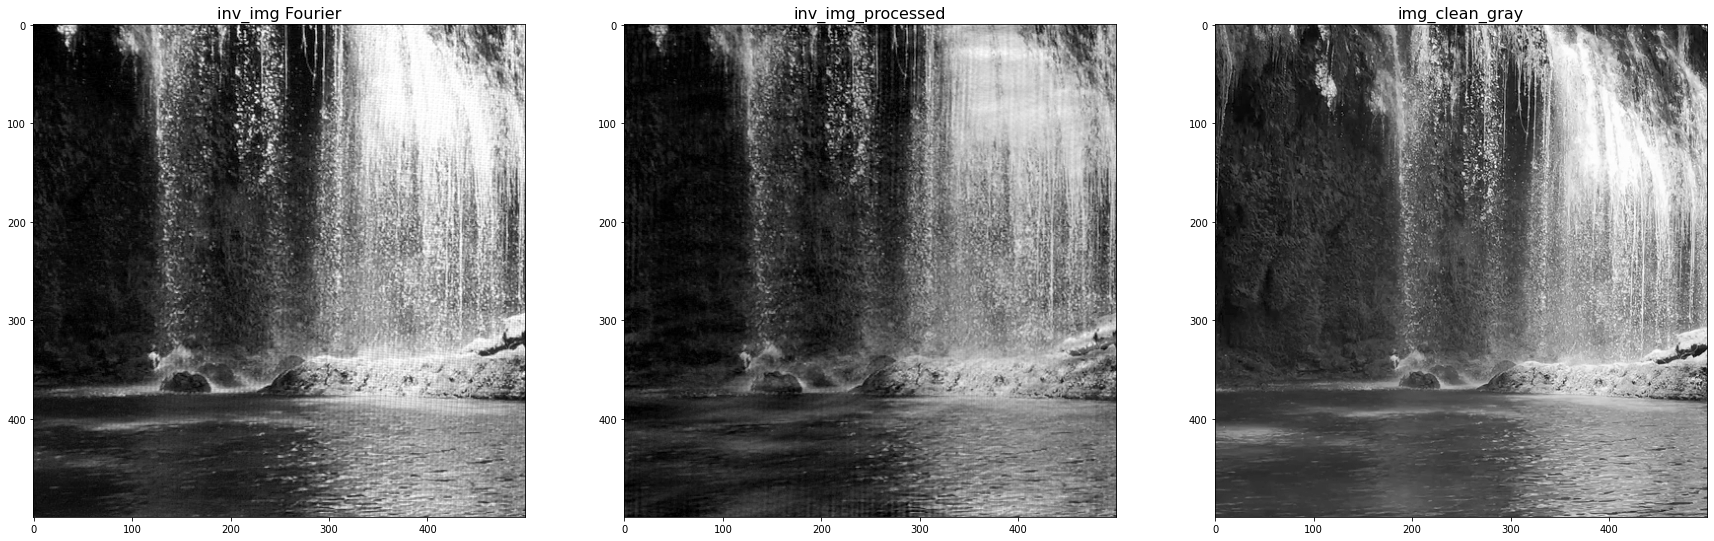

In [55]:



inv_img = abs(np.fft.ifft2(img_filmed_gray_fourier))
# plt.figure(figsize=(10, 10))
# plt.imshow(inv_img, cmap="gray")
# plt.show()

inv_img_processed = abs(np.fft.ifft2(img_filmed_gray_fourier_processd))
# plt.figure(figsize=(10, 10))
# plt.imshow(inv_img_processed, cmap="gray")
# plt.show()


fig, ax = plt.subplots(1, 3, figsize=(30, 30))
ax[0].imshow(inv_img, cmap="gray")
ax[0].set_title('inv_img Fourier', fontsize=FONT_SIZE)
ax[1].imshow(inv_img_processed, cmap="gray")
ax[1].set_title('inv_img_processed', fontsize=FONT_SIZE)
ax[2].imshow(img_clean_gray, cmap='gray')
ax[2].set_title('img_clean_gray', fontsize=FONT_SIZE)


plt.imsave("inv_img.png", inv_img, cmap="gray")
plt.imsave("inv_img_processed.png", inv_img_processed, cmap="gray")
plt.imsave("img_clean_gray.png", img_clean_gray, cmap="gray")
